### Here,  importing the numpy as np helps user to work with arrays and work in  domain of linear algebra. Importing matplot helps us to plot the graph. Random returns a random floating number between 0 & 1. Importing pandas as pd helps in data processing. Dataframe helps in keeping all the data in table form. 

In [1]:
import numpy as np # linear algebra
import matplotlib
import matplotlib.pyplot as plt
import random
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame

### Importing tensorflow allows developer to create dataflow graphs-structures that describes how data moves through a graph or a series of processing nodes. A sequential model helps you to create models layer by layer for most problem. Input takes the data for different layers. Dense layer is asimple layer of neurons in which each neuron recieves input from all the neurons of previous layer. BatchNormalization layer allows us to set each parameters independently. Dropout layer importing helps in stting input units to 0 with a frequency of rate at each step during training time. Importing metrics is used to judge the performance of our model. 

In [2]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model

In [3]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
## training and test datasets

#data_train = pd.read_csv('/home/kanhaiya/neural_network_biology/train_ann_term.csv')
#data_test = pd.read_csv('/home/kanhaiya/neural_network_biology/test_ann_term.csv')
data_train = pd.read_csv('../train_ann_term.csv')
data_test = pd.read_csv('../test_ann_term.csv')

In [5]:
print(data_train)

       class  lepton_pT  lepton_eta  lepton_phi  missing_energy_magnitude  \
0          1   0.907542    0.329147    0.359412                  1.497970   
1          1   0.798835    1.470639   -1.635975                  0.453773   
2          0   1.344385   -0.876626    0.935913                  1.992050   
3          0   1.595839   -0.607811    0.007075                  1.818450   
4          1   0.409391   -1.884684   -1.027292                  1.672452   
...      ...        ...         ...         ...                       ...   
68631      0   0.631747   -1.732745    0.734498                  0.647226   
68632      0   0.967752   -0.317568   -1.579379                  0.512029   
68633      1   0.908091   -0.825006   -0.830871                  0.736298   
68634      0   0.903699    0.261943   -0.429149                  1.892855   
68635      0   0.566047   -0.317568    0.062561                  0.358186   

       missing_energy_phi    jet1pt   jet1eta   jet1phi  jet1b.tag  ...  \


In [6]:
feature_names = data_train.columns[1:-1]  # we skip the first and last column

In [39]:
# initialize the model parameters

variables = data_train.columns[1:-1]  # we skip the first and last column
target_training = None
discriminator_history = None
sample_training = None
sample_validation = None

###  Seed in python is used to initialize the random number generator or simply to generate a random number. The discriminator is a model with a one-dimensional input and a one-dimensional output. It willl recieve a sample from the real data or from the generator and will provide the probability that the sample belongs to real training data. A layer is a data-processing module that takes as input one or more tensors and that outputs one or more tensors. Epochs indicates the number of passes of the entire training dataset the machine learning algorithm has completed. Here, dropout is used to prevent a model from overfitting. Fraction is used to provides support for rational number arithmetic. Batch size refers to the number of training examples utilized in one iteration. An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. SGD stands for Stochastic Gradient Descent whic is an optimization algorithm often used to find the best fit between predicted and actual outputs.    

In [7]:
seed = 193 #generates a random number
discriminator_nodes =  16 # 20
discriminator_layers = 1
discriminator_epochs = 50
validation_fraction = 0.4
discriminator_dropout =  0.4
        
batchSize = 128 # 512
discriminator_optimizer = SGD(lr =0.01)
discriminator_history_array = []

In [8]:
neural_network_input_dimension = variables.shape


weight_train = np.reshape([random.random()/10 for i in range(len(data_train))], (len(data_train), 1))
weight_test = np.reshape([random.random()/10 for i in range(len(data_test))], (len(data_test), 1))
target_training = data_train["class"]
target_validation = data_test["class"]
sample_training = data_train[feature_names]
sample_validation = data_test[feature_names]


NameError: name 'variables' is not defined

In [9]:
# Scaling the sample data 
scaler = StandardScaler()
sample_training_scaled = scaler.fit_transform(sample_training)
sample_validation_scaled = scaler.fit_transform(sample_validation)

# Making the table of the data using DataFrame

sample_training_scaled = DataFrame(sample_training_scaled)
sample_validation_scaled = DataFrame(sample_validation_scaled)

        # Renaming the name of the columns after scaling 
sample_training_scaled.columns = sample_training.columns
sample_validation_scaled.columns = sample_validation.columns
        
# Including the target training and validation output by adding one more column

sample_training_scaled['target_training'] = target_training
sample_validation_scaled['target_validation'] = target_validation
        
#print(sample_training_scaled)  # to see the data

NameError: name 'sample_training' is not defined

In [10]:
# Create the model 

network_input = Input( shape = (neural_network_input_dimension))
neural_network_layer = Dense(discriminator_nodes, activation = "elu", name="HiddenLayer")(network_input)
neural_network_layer = Dense(1, activation = "sigmoid")(neural_network_layer)
        
model = Model(inputs=network_input, outputs= neural_network_layer)
model.summary()
plot_model(model, to_file='neural_network_graph.pdf')

NameError: name 'neural_network_input_dimension' is not defined

In [11]:
# compile_model

model.compile(loss = "binary_crossentropy", weighted_metrics = [metrics.binary_accuracy], optimizer = "adam", metrics=['accuracy'])

NameError: name 'model' is not defined

In [12]:
# fit_model

discriminator_history = model.fit(sample_training, target_training.ravel(), epochs=discriminator_epochs, batch_size = batchSize, sample_weight = weight_train.ravel(), validation_data = (sample_validation, target_validation, weight_test.ravel()))
discriminator_history_array.append(discriminator_history)

NameError: name 'model' is not defined

In [13]:
# predict_model

model_prediction = model.predict(sample_validation).ravel()
model_val_prediction = model.predict(sample_training).ravel()


fpr, tpr, threshold = roc_curve(target_validation, model_prediction)
fpr_2, tpr_2, threshold_2 = roc_curve(target_training, model_val_prediction)
auc_1 = auc(fpr, tpr)
auc_2 = auc(fpr_2, tpr_2)

NameError: name 'model' is not defined

In [14]:
# plotLosses

plt.plot(discriminator_history.history['loss'])
plt.plot(discriminator_history.history['val_loss'])
plt.title('Discriminator Losses',fontsize='large')
plt.ylabel('Loss',fontsize='large')
plt.xlabel('Epoch',fontsize='large')
plt.xlim(0,discriminator_epochs)
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('losses.pdf')

NameError: name 'discriminator_history' is not defined

NameError: name 'fpr_2' is not defined

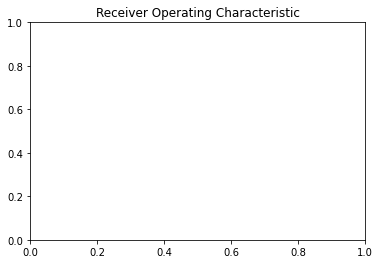

In [15]:
# plotRoc

plt.title('Receiver Operating Characteristic',fontsize='large')
plt.plot(fpr_2, tpr_2, 'g--', label='Train AUC = %0.2f'% auc_2)
plt.plot(fpr, tpr, 'b', label='Test AUC = %0.2f'% auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.,1.])
plt.ylim([-0.,1.])
plt.ylabel('True Positive Rate', fontsize='large')
plt.xlabel('False Positive Rate', fontsize='large')
plt.legend(frameon=False)
plt.savefig('roc.pdf')

In [16]:
# plotAccuracy

plt.plot(discriminator_history.history['accuracy'])
plt.plot(discriminator_history.history['val_accuracy'])
plt.title('Model accuracy',fontsize='large')
plt.ylabel('Accuracy',fontsize='large')
plt.xlabel('Epoch',fontsize='large')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('acc.pdf')

NameError: name 'discriminator_history' is not defined

In [17]:
# plotSeparation

signal_histo = []
background_histo = []
signal_histo_train = []
background_histo_train = []
for i in range(len(sample_validation)):
    if target_validation[i] == 1:
        signal_histo.append(model_prediction[i])
    if target_validation[i] == 0:
        background_histo.append(model_prediction[i])
for i in range(len(sample_training)):
    if target_training[i] == 1:
        signal_histo_train.append(model_val_prediction[i])
    if target_training[i] == 0:
        background_histo_train.append(model_val_prediction[i])
        
plt.hist(signal_histo_train, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, label = "Signal_train")
plt.hist(background_histo_train, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, label = "Background_train")
plt.hist(signal_histo, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, linestyle='dashed',  label = "Signal_test")
plt.hist(background_histo, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, linestyle='dashed', label = "Background_test")
        
plt.legend()
plt.title('Network response',fontsize='large')
plt.xticks([0.0,0.5,1.0],["Background","","Signal"],rotation=0)
# plt.xlabel('Network response', horizontalalignment='left', fontsize='large')
plt.ylabel('Event fraction', fontsize='large')
plt.legend(frameon=False)
plt.show()
plt.savefig('separation_discriminator.pdf')

NameError: name 'sample_validation' is not defined